In [ ]:
import pandas as pd
import numpy
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [131]:
dataset = "https://www.kaggle.com/datasets/prishasawhney/mushroom-dataset"

In [ ]:
df = pd.read_csv("/content/mushroom_cleaned.csv")

In [ ]:
df.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [ ]:
df.tail()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
54030,73,5,3,2,0.887740,569,12,0.943195,1
54031,82,2,3,2,1.186164,490,12,0.943195,1
54032,82,5,3,2,0.915593,584,12,0.888450,1
54033,79,2,3,2,1.034963,491,12,0.888450,1
54034,72,5,3,2,1.158311,492,12,0.888450,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cap-diameter,54035.0,567.257204,359.883763,0.000000,289.000000,525.000000,781.000000,1891.000000
cap-shape,54035.0,4.000315,2.160505,0.000000,2.000000,5.000000,6.000000,6.000000
gill-attachment,54035.0,2.142056,2.228821,0.000000,0.000000,1.000000,4.000000,6.000000
gill-color,54035.0,7.329509,3.200266,0.000000,5.000000,8.000000,10.000000,11.000000
stem-height,54035.0,0.759110,0.650969,0.000426,0.270997,0.593295,1.054858,3.835320
stem-width,54035.0,1051.081299,782.056076,0.000000,421.000000,923.000000,1523.000000,3569.000000
stem-color,54035.0,8.418062,3.262078,0.000000,6.000000,11.000000,11.000000,12.000000
season,54035.0,0.952163,0.305594,0.027372,0.888450,0.943195,0.943195,1.804273
class,54035.0,0.549181,0.497580,0.000000,0.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(columns = ["class"])
y = df["class"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state= 42)

In [ ]:
len(X_train), len(y_train), len(X_test), len(y_test)

(48631, 48631, 5404, 5404)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier()

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(f"Training accuracy : {accuracy_score (y_train, model.predict(X_train))}")
print(f"Test accuracy : {accuracy_score (y_test, model.predict(X_test))}")

Training accuracy : 1.0
Test accuracy : 0.9748334566987417


# Bagging a Decision tree

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(n_estimators= 10 )

In [ ]:
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print(f"Training error :: {accuracy_score(y_train, model.predict(X_train))}")
print(f"Testing error :: {accuracy_score(y_test, model.predict(X_test))}")

Training error :: 0.9993625465238223
Testing error :: 0.9879718726868986


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2442
           1       0.99      0.99      0.99      2962

    accuracy                           0.99      5404
   macro avg       0.99      0.99      0.99      5404
weighted avg       0.99      0.99      0.99      5404



In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[2411,   31],
       [  34, 2928]])

<Axes: >

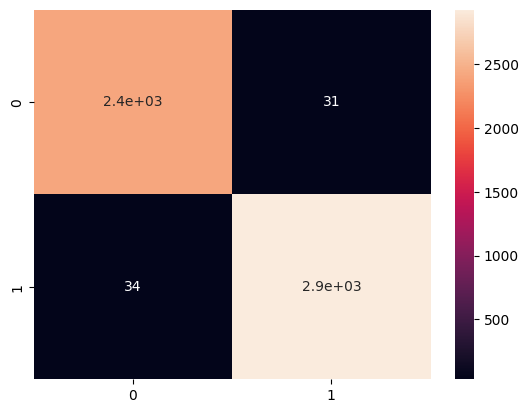

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
print(roc_curve(y_test, y_pred))

(array([0.        , 0.01269451, 1.        ]), array([0.        , 0.98852127, 1.        ]), array([inf,  1.,  0.]))


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [ ]:
roc_auc = auc(fpr, tpr)

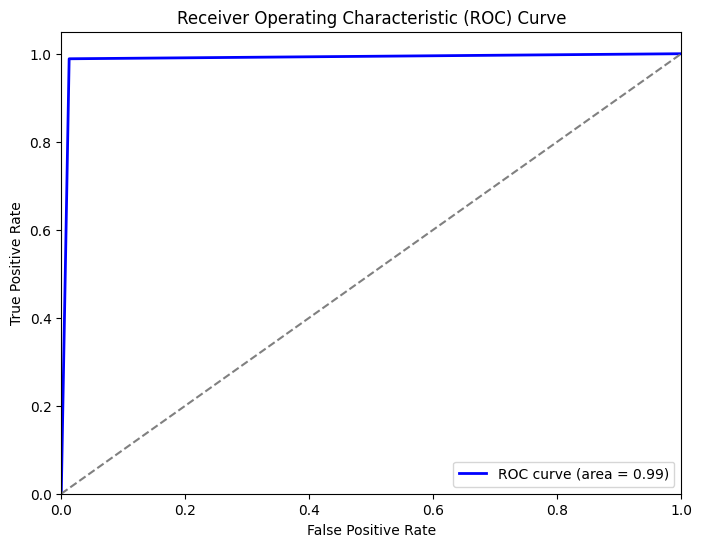

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
print(f'AUC Score: {roc_auc:.2f}')

AUC Score: 0.99
